Download prerequisite for fewshot-face-translation-GAN.

In [1]:
!git clone --recursive --branch tf-version-in-notebook https://github.com/amrzv/fewshot-face-translation-GAN.git

fatal: destination path 'fewshot-face-translation-GAN' already exists and is not an empty directory.


In [2]:
%cd "fewshot-face-translation-GAN"

/content/fewshot-face-translation-GAN


In [3]:
# Download pre-trined weights
!mkdir weights
!gdown --id 1DUMmZGTGKMyEYSKy-w34IDHawVF24rIs -O weights/encoder.h5
!gdown --id 1xl8cg7xaRnMsyiODcXguJ83d5hwodckB -O weights/decoder.h5

mkdir: cannot create directory ‘weights’: File exists
/usr/local/lib/python3.7/dist-packages/gdown/cli.py:131: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  category=FutureWarning,
Downloading...
From: https://drive.google.com/uc?id=1DUMmZGTGKMyEYSKy-w34IDHawVF24rIs
To: /content/fewshot-face-translation-GAN/weights/encoder.h5
100% 6.26M/6.26M [00:00<00:00, 300MB/s]
/usr/local/lib/python3.7/dist-packages/gdown/cli.py:131: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  category=FutureWarning,
Downloading...
From: https://drive.google.com/uc?id=1xl8cg7xaRnMsyiODcXguJ83d5hwodckB
To: /content/fewshot-face-translation-GAN/weights/decoder.h5
100% 124M/124M [00:00<00:00, 275MB/s]


Load GAN model

In [4]:
import warnings
warnings.filterwarnings("ignore")

In [5]:
from models import FaceTranslationGANInferenceModel

In [6]:
model = FaceTranslationGANInferenceModel()

Found checkpoints in weights folder. Built model with pre-trained weights.


Load face-toolbox

In [7]:
from face_toolbox_keras.models.verifier.face_verifier import FaceVerifier
fv = FaceVerifier(classes=512)

from face_toolbox_keras.models.parser import face_parser
fp = face_parser.FaceParser()

from face_toolbox_keras.models.detector import face_detector
fd = face_detector.FaceAlignmentDetector()

from face_toolbox_keras.models.detector.iris_detector import IrisDetector
idet = IrisDetector()
#idet.set_detector(fd)

Translate faces

In [8]:
import numpy as np
from utils import utils
from matplotlib import pyplot as plt
from google.colab import files
from google.colab import drive
import os
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [10]:
# celebA dataset
celeba = os.listdir('/content/gdrive/MyDrive/CelebA-100')
print("how many images in here: ",len(celeba))
root = []
for k in range(0,len(celeba)):
  root.append('/content/gdrive/MyDrive/CelebA-100/' + celeba[k])

how many images in here:  200


In [11]:
# target image 
target = os.listdir('/content/gdrive/MyDrive/target_images')
print("how many images in here: ",len(target))
obama = '/content/gdrive/MyDrive/target_images/obama.jpg'
kobe = '/content/gdrive/MyDrive/target_images/kobe.jpg'
ariana = '/content/gdrive/MyDrive/target_images/ariana.jpg'

how many images in here:  3


Inference

In [13]:
import os
def deepfake(person_root, person_str):
  # please create the results folder in first time
  #os.mkdir('/content/gdrive/MyDrive/Results_' + person_str)
  for k in range(0,len(root)):
    src, mask, aligned_im, (x0, y0, x1, y1), landmarks = utils.get_src_inputs(root[k], fd, fp, idet)
    tar, emb_tar = utils.get_tar_inputs(person_root, fd, fv)
    out = model.inference(src, mask, tar, emb_tar)
    result_face = np.squeeze(((out[0] + 1) * 255 / 2).astype(np.uint8))
    file = root[k].split('/')
    filename = '/content/gdrive/MyDrive/Results_' + person_str + '/' + file[-1]
    print(k,filename)
    plt.imshow(result_face)
    plt.savefig(filename)

1/1 [==============================] - 3s 3s/step
Building FAN for landmarks detection...


Done.
1/1 [==============================] - 2s 2s/step


1/1 [==============================] - 0s 35ms/step


1/1 [==============================] - 2s 2s/step
0 /content/gdrive/MyDrive/Results_obama/4-O.jpg
1/1 [==============================] - 0s 28ms/step
1 /content/gdrive/MyDrive/Results_obama/4-P.jpg
1/1 [==============================] - 0s 28ms/step
2 /content/gdrive/MyDrive/Results_obama/3-O.jpg
1/1 [==============================] - 0s 28ms/step
3 /content/gdrive/MyDrive/Results_obama/1-O.jpg
1/1 [==============================] - 0s 28ms/step
4 /content/gdrive/MyDrive/Results_obama/5-P.jpg
1/1 [==============================] - 0s 29ms/step
5 /content/gdrive/MyDrive/Results_obama/1-P.jpg
1/1 [==============================] - 0s 32ms/step
6 /content/gdrive/MyDrive/Results_obama/2-P.jpg
1/1 [==============================] - 0s 30ms/step
7 /content/gdrive/MyDrive/Results_obama/5-O.jpg
1/1 [==============================] - 0s 28ms/step
8 /content/gdrive/MyDrive/Results_obama/6-O.jpg
1/1 [==============================] - 0s 36ms/step
9 /content/gdrive/MyDrive/Results_obama/6-P.jpg
1/

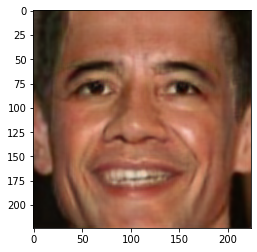

In [14]:
deepfake('/content/gdrive/MyDrive/target_images/obama.jpg', 'obama')

1/1 [==============================] - 2s 2s/step
0 /content/gdrive/MyDrive/Results_kobe/4-O.jpg
1/1 [==============================] - 0s 32ms/step
1 /content/gdrive/MyDrive/Results_kobe/4-P.jpg
1/1 [==============================] - 0s 34ms/step
2 /content/gdrive/MyDrive/Results_kobe/3-O.jpg
1/1 [==============================] - 0s 27ms/step
3 /content/gdrive/MyDrive/Results_kobe/1-O.jpg
1/1 [==============================] - 0s 33ms/step
4 /content/gdrive/MyDrive/Results_kobe/5-P.jpg
1/1 [==============================] - 0s 27ms/step
5 /content/gdrive/MyDrive/Results_kobe/1-P.jpg
1/1 [==============================] - 0s 32ms/step
6 /content/gdrive/MyDrive/Results_kobe/2-P.jpg
1/1 [==============================] - 0s 35ms/step
7 /content/gdrive/MyDrive/Results_kobe/5-O.jpg
1/1 [==============================] - 0s 31ms/step
8 /content/gdrive/MyDrive/Results_kobe/6-O.jpg
1/1 [==============================] - 0s 28ms/step
9 /content/gdrive/MyDrive/Results_kobe/6-P.jpg
1/1 [=======

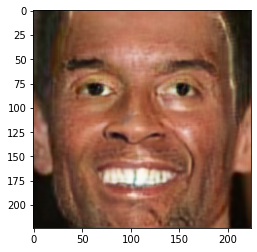

In [15]:
deepfake('/content/gdrive/MyDrive/target_images/kobe.jpg', 'kobe')

1/1 [==============================] - 0s 40ms/step
0 /content/gdrive/MyDrive/Results_ariana/4-O.jpg
1/1 [==============================] - 0s 28ms/step
1 /content/gdrive/MyDrive/Results_ariana/4-P.jpg
1/1 [==============================] - 0s 30ms/step
2 /content/gdrive/MyDrive/Results_ariana/3-O.jpg
1/1 [==============================] - 0s 35ms/step
3 /content/gdrive/MyDrive/Results_ariana/1-O.jpg
1/1 [==============================] - 0s 31ms/step
4 /content/gdrive/MyDrive/Results_ariana/5-P.jpg
1/1 [==============================] - 0s 28ms/step
5 /content/gdrive/MyDrive/Results_ariana/1-P.jpg
1/1 [==============================] - 0s 27ms/step
6 /content/gdrive/MyDrive/Results_ariana/2-P.jpg
1/1 [==============================] - 0s 28ms/step
7 /content/gdrive/MyDrive/Results_ariana/5-O.jpg
1/1 [==============================] - 0s 37ms/step
8 /content/gdrive/MyDrive/Results_ariana/6-O.jpg
1/1 [==============================] - 0s 28ms/step
9 /content/gdrive/MyDrive/Results_arian

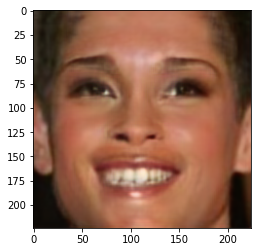

In [16]:
deepfake('/content/gdrive/MyDrive/target_images/ariana.jpg', 'ariana')

Evaluation

In [17]:
def MSE(imageA, imageB):
  err = np.sum((imageA.astype("float") - imageB.astype("float")) ** 2)
  err /= float(imageA.shape[0] * imageA.shape[1])
  return err

In [23]:
import cv2

mse_score_A = []
mse_score_O = []
mse_score_K = []

for k in range(1,101):
  iA = cv2.imread('/content/gdrive/MyDrive/Results_ariana/'+str(k)+'-O.jpg')
  iB = cv2.imread('/content/gdrive/MyDrive/Results_ariana/'+str(k)+'-P.jpg')

  iC = cv2.imread('/content/gdrive/MyDrive/Results_kobe/'+str(k)+'-O.jpg')
  iD = cv2.imread('/content/gdrive/MyDrive/Results_kobe/'+str(k)+'-P.jpg')

  iE = cv2.imread('/content/gdrive/MyDrive/Results_obama/'+str(k)+'-O.jpg')
  iF = cv2.imread('/content/gdrive/MyDrive/Results_obama/'+str(k)+'-P.jpg')

  mse_score_A.append(MSE(iA,iB))
  mse_score_K.append(MSE(iC,iD))
  mse_score_O.append(MSE(iE,iF))

print('MSE DeepFake ariana: ',sum(mse_score_A)/len(mse_score_A))
print('MSE DeepFake kobe: ',sum(mse_score_O)/len(mse_score_O))
print('MSE DeepFake obama: ',sum(mse_score_K)/len(mse_score_K))

MSE DeepFake ariana:  110.83196823559676
MSE DeepFake kobe:  155.65045669367285
MSE DeepFake obama:  252.6737121431327


In [24]:
from skimage.metrics import structural_similarity

SSIM_A = []
SSIM_K = []
SSIM_O = []

for k in range(1,101):
  iA = cv2.imread('/content/gdrive/MyDrive/Results_ariana/'+str(k)+'-O.jpg')
  iB = cv2.imread('/content/gdrive/MyDrive/Results_ariana/'+str(k)+'-P.jpg')
  iB = cv2.resize(iB,(iA.shape[1],iA.shape[0]))

  iC = cv2.imread('/content/gdrive/MyDrive/Results_kobe/'+str(k)+'-O.jpg')
  iD = cv2.imread('/content/gdrive/MyDrive/Results_kobe/'+str(k)+'-P.jpg')
  iD = cv2.resize(iD,(iC.shape[1],iC.shape[0]))

  iE = cv2.imread('/content/gdrive/MyDrive/Results_obama/'+str(k)+'-O.jpg')
  iF = cv2.imread('/content/gdrive/MyDrive/Results_obama/'+str(k)+'-P.jpg')
  iF = cv2.resize(iF,(iE.shape[1],iE.shape[0]))

  SSIM_A.append(structural_similarity(iA, iB, data_range=255, multichannel=True))
  SSIM_K.append(structural_similarity(iC, iD, data_range=255, multichannel=True))
  SSIM_O.append(structural_similarity(iE, iF, data_range=255, multichannel=True))

print('SSIM DeepFake ariana: ',sum(SSIM_A)/len(SSIM_A))
print('SSIM DeepFake kobe: ',sum(SSIM_K)/len(SSIM_K))
print('SSIM DeepFake obama: ',sum(SSIM_O)/len(SSIM_O))

SSIM DeepFake ariana:  0.9634182427464103
SSIM DeepFake kobe:  0.9367161825780428
SSIM DeepFake obama:  0.9536783536324691


In [32]:
import numpy as np
def L1(ia,ib):
  return np.linalg.norm((ia-ib),ord=1)

def L2(ia,ib):
  return np.linalg.norm((ia-ib),ord=2)

In [35]:
import numpy as np
from PIL import Image

L1_A = []
L2_A = []

L1_O = []
L2_O = []

L1_K = []
L2_K = []

for k in range(1,101):
  a = np.array(Image.open('/content/gdrive/MyDrive/Results_ariana/'+str(k)+'-P.jpg').convert('L'))
  b = np.array(Image.open('/content/gdrive/MyDrive/Results_ariana/'+str(k)+'-O.jpg').convert('L'))

  c = np.array(Image.open('/content/gdrive/MyDrive/Results_kobe/'+str(k)+'-O.jpg').convert('L'))
  d = np.array(Image.open('/content/gdrive/MyDrive/Results_kobe/'+str(k)+'-P.jpg').convert('L'))

  e = np.array(Image.open('/content/gdrive/MyDrive/Results_obama/'+str(k)+'-P.jpg').convert('L'))
  f = np.array(Image.open('/content/gdrive/MyDrive/Results_obama/'+str(k)+'-O.jpg').convert('L'))

  L1_A.append(L1(a,b))
  L1_O.append(L1(e,f))
  L1_K.append(L1(c,d))

  L2_A.append(L2(a,b))
  L2_O.append(L2(e,f))
  L2_K.append(L2(c,d))

print(sum(L1_A)/len(L1_A))
print(sum(L1_O)/len(L1_O))
print(sum(L1_K)/len(L1_K))

print(sum(L2_A)/len(L2_A))
print(sum(L2_O)/len(L2_O))
print(sum(L2_K)/len(L2_K))

40880.48
40713.74
38956.91
26255.53100677204
26724.60135727214
26503.333082613208
